In [153]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

# 전처리

In [154]:
df = pd.read_csv('../../preprocessed/data.csv')
df.dropna(inplace=True)

In [155]:
# x 데이터 : 전용면적(㎡), 층, 건축년도, 위도, 경도, 입지와 최소 거리
# y 데이터 : 거래금액(만원)

In [156]:
x = df.drop(columns=['단지명','주소', '거래금액(만원)','계약년월','전용면적(㎡)','층','위도','경도','건축년도'])
preset = df[['계약년월','거래금액(만원)']]

In [157]:
# .loc 사용하여 안전하게 값 변경
preset.loc[:, '거래금액(만원)'] = preset['거래금액(만원)'].str.replace(',', '', regex=False).astype(float)
preset.loc[:, '계약년월'] = preset['계약년월'].astype(str)
preset

,계약년월,거래금액(만원)
0,202408,17800.0
1,202408,33000.0
2,202408,11500.0
3,202408,34700.0
4,202408,20000.0
...,...,...
18718,202108,48000.0
18719,202108,19800.0
18720,202108,6800.0
18721,202108,52500.0


In [158]:
price_index = pd.read_csv('../../preprocessed/가격지수/price_index.csv')

In [159]:
# 가격 지수를 행으로 변환
price_index = price_index.T
price_index.columns = ['price_index']
price_index = price_index.reset_index().rename(columns={'index': '계약년월'})

In [160]:
# preset과 price_index를 '계약년월' 기준으로 병합
merged_df = pd.merge(preset, price_index, on='계약년월', how='left')
merged_df = merged_df.fillna(100)
merged_df['조정된 거래금액(만원)'] = merged_df['거래금액(만원)'] / merged_df['price_index'] * 100

In [161]:
y = merged_df['조정된 거래금액(만원)']

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 랜덤포레스트

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

# 선형회귀모델

In [165]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# 의사결정트리

In [166]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

# KNN

In [167]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

# XGBOOST

In [168]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# LightGBM

In [169]:
from lightgbm import LGBMRegressor
gbm = LGBMRegressor()
gbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4883
[LightGBM] [Info] Number of data points in the train set: 14746, number of used features: 21
[LightGBM] [Info] Start training from score 26644.998619


LGBMRegressor()

# Ridge, Lasso

In [170]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [171]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

# 그라디언트 부스팅

In [172]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

# Catboost

In [173]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(x_train, y_train)

Learning rate set to 0.062637
0:	learn: 14184.0188219	total: 2.92ms	remaining: 2.92s
1:	learn: 13656.5926761	total: 5.21ms	remaining: 2.6s
2:	learn: 13148.3629772	total: 8.08ms	remaining: 2.69s
3:	learn: 12657.5988181	total: 10.9ms	remaining: 2.71s
4:	learn: 12207.4107797	total: 13.3ms	remaining: 2.65s
5:	learn: 11796.4747365	total: 15.7ms	remaining: 2.6s
6:	learn: 11392.6812076	total: 18.3ms	remaining: 2.6s
7:	learn: 11021.8299929	total: 20.9ms	remaining: 2.59s
8:	learn: 10676.1653434	total: 23.1ms	remaining: 2.55s
9:	learn: 10374.7090761	total: 25.2ms	remaining: 2.5s
10:	learn: 10089.4663965	total: 27.5ms	remaining: 2.47s
11:	learn: 9790.2287352	total: 29.7ms	remaining: 2.45s
12:	learn: 9525.5197596	total: 31.9ms	remaining: 2.42s
13:	learn: 9270.2259443	total: 34.4ms	remaining: 2.42s
14:	learn: 9069.3042433	total: 37.2ms	remaining: 2.44s
15:	learn: 8854.8030654	total: 39.6ms	remaining: 2.44s
16:	learn: 8646.1115944	total: 41.8ms	remaining: 2.42s
17:	learn: 8455.5703872	total: 44ms	re

# 모델 평가

In [174]:
from sklearn.metrics import *

# rmse 함수
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# adjusted r2 함수
def calculate_adjusted_r2(y_true, y_pred, num_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_features - 1)
    return adjusted_r2

def evaluate_model(model, name, model_df):
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    adjusted_r2 = calculate_adjusted_r2(y_test, y_pred, x_test.shape[1])

    print('모델 이름 : ', name)
    print('----------------------')
    print('MSE: {0:.3f}'.format(mse))
    print('MAE: {0:.3f}'.format(mae))
    print('RMSE: {0:.3f}'.format(rmse))
    print('R-Score: {0:.3f}'.format(r2))
    print('Adjsuted R-Score: {0:.3f}'.format(adjusted_r2))
    print('----------------------')

    model_df.loc[len(model_df)] = [name, mse, mae, rmse, r2, adjusted_r2] 
    

In [175]:
model_df = pd.DataFrame({
    'model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Score': [],
    'Adjusted R-Score': []
})

In [176]:
evaluate_model(rf, '랜덤포레스트', model_df)

모델 이름 :  랜덤포레스트
----------------------
MSE: 17959162.778
MAE: 2805.602
RMSE: 4237.825
R-Score: 0.919
Adjsuted R-Score: 0.918
----------------------


In [177]:
evaluate_model(lr, '선형회귀', model_df)

모델 이름 :  선형회귀
----------------------
MSE: 98189634.166
MAE: 7520.560
RMSE: 9909.068
R-Score: 0.555
Adjsuted R-Score: 0.552
----------------------


In [178]:
evaluate_model(dt, '의사결정트리', model_df)

모델 이름 :  의사결정트리
----------------------
MSE: 17919752.681
MAE: 2800.315
RMSE: 4233.173
R-Score: 0.919
Adjsuted R-Score: 0.918
----------------------


In [179]:
evaluate_model(knn, 'KNN', model_df)

모델 이름 :  KNN
----------------------
MSE: 22026804.468
MAE: 3080.560
RMSE: 4693.272
R-Score: 0.900
Adjsuted R-Score: 0.900
----------------------


In [180]:
evaluate_model(xgb, 'XGBoost', model_df)

모델 이름 :  XGBoost
----------------------
MSE: 18017508.248
MAE: 2802.405
RMSE: 4244.704
R-Score: 0.918
Adjsuted R-Score: 0.918
----------------------


In [181]:
evaluate_model(gbm, 'LightGBM', model_df)

모델 이름 :  LightGBM
----------------------
MSE: 18061711.753
MAE: 2815.398
RMSE: 4249.907
R-Score: 0.918
Adjsuted R-Score: 0.918
----------------------


In [182]:
evaluate_model(ridge, 'Ridge', model_df)

모델 이름 :  Ridge
----------------------
MSE: 98209892.817
MAE: 7511.135
RMSE: 9910.090
R-Score: 0.555
Adjsuted R-Score: 0.552
----------------------


In [183]:
evaluate_model(lasso, 'Lasso', model_df)

모델 이름 :  Lasso
----------------------
MSE: 98212844.801
MAE: 7518.601
RMSE: 9910.239
R-Score: 0.555
Adjsuted R-Score: 0.552
----------------------


In [184]:
evaluate_model(gb, '그라디언트 부스팅', model_df)

모델 이름 :  그라디언트 부스팅
----------------------
MSE: 26377771.450
MAE: 3638.256
RMSE: 5135.929
R-Score: 0.880
Adjsuted R-Score: 0.880
----------------------


In [185]:
evaluate_model(cat, 'Catboost', model_df)

모델 이름 :  Catboost
----------------------
MSE: 18051237.607
MAE: 2803.139
RMSE: 4248.675
R-Score: 0.918
Adjsuted R-Score: 0.918
----------------------


In [186]:
model_df

,model,MSE,MAE,RMSE,R-Score,Adjusted R-Score
0,랜덤포레스트,1.795916e+07,2805.602339,4237.825242,0.918561,0.918095
1,선형회귀,9.818963e+07,7520.559614,9909.068279,0.554744,0.552193
2,의사결정트리,1.791975e+07,2800.314601,4233.172886,0.918740,0.918275
3,KNN,2.202680e+07,3080.560271,4693.272256,0.900116,0.899544
4,XGBoost,1.801751e+07,2802.405320,4244.703552,0.918297,0.917829
5,LightGBM,1.806171e+07,2815.397988,4249.907264,0.918096,0.917627
6,Ridge,9.820989e+07,7511.134529,9910.090455,0.554652,0.552101
7,Lasso,9.821284e+07,7518.600730,9910.239392,0.554639,0.552087
8,그라디언트 부스팅,2.637777e+07,3638.255873,5135.929463,0.880386,0.879701
9,Catboost,1.805124e+07,2803.139161,4248.674806,0.918144,0.917675


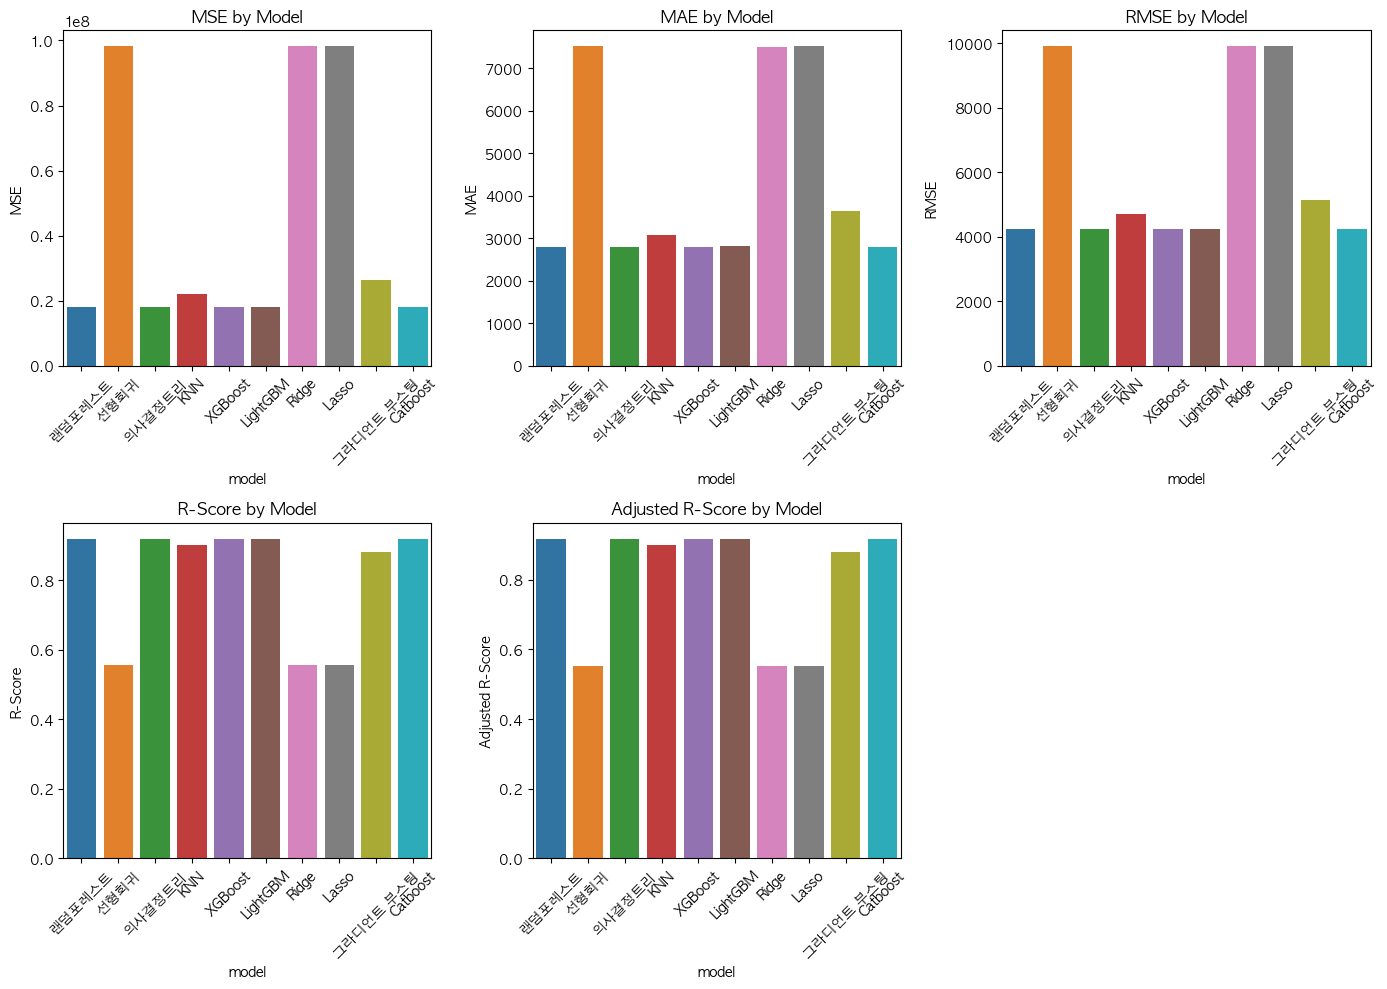

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

metrics = ['MSE', 'MAE', 'RMSE', 'R-Score', 'Adjusted R-Score']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='model', y=metric, data=model_df)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [188]:
# 특성 중요도 추출
feature_importances = rf.feature_importances_
x_list = x.columns.to_list()

# 특성 중요도 출력
for idx, importance in enumerate(feature_importances):
    print(f'{idx} {x_list[idx]}: {importance:.4f}')

0 약국: 0.0547
1 의원: 0.0155
2 일반병원: 0.1126
3 종합병원: 0.1095
4 요양병원: 0.0061
5 보건병원: 0.0951
6 한방병원: 0.0344
7 치과: 0.0063
8 대형상권: 0.0199
9 공원: 0.0501
10 도서관: 0.0089
11 카페: 0.0348
12 편의점: 0.0092
13 유치원: 0.2142
14 어린이집: 0.0414
15 초등학교: 0.0083
16 중학교: 0.0600
17 고등학교: 0.0111
18 학원: 0.0406
19 지하철: 0.0331
20 버스정류장: 0.0343


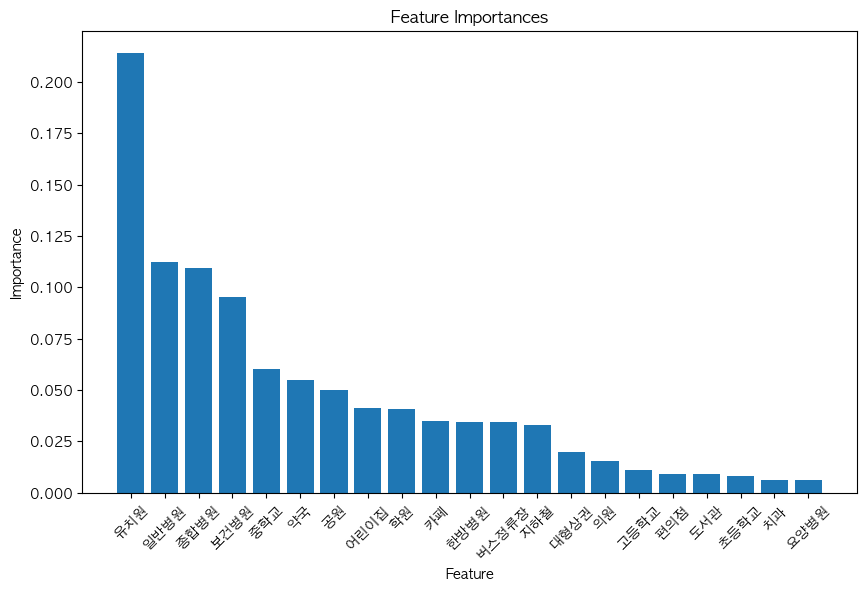

In [189]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)[::-1]
new_list = [x_list[i] for i in indices]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), new_list, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()